# Individual Project

### **<u>Import Statements</u>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import humanize
from functools import partial
import seaborn as sns
import hvplot.pandas

pd.set_option("display.max_columns", 100)

# Set visualisation style
sns.set_style("whitegrid")
sns.set_palette("colorblind")  # Accessible color palette

# Set figure quality
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 300  # High resolution for saving

### **<u>Loading Dataframes</u>**

In [2]:
hdi = pd.read_csv("HDI.csv")
wb = pd.read_csv("WorldBank.csv")

print(hdi)
print()
print(wb)

          iso3                          country    hdicode region  \
0          AFG                      Afghanistan        Low     SA   
1          AGO                           Angola     Medium    SSA   
2          ALB                          Albania       High    ECA   
3          AND                          Andorra  Very High    NaN   
4          ARE             United Arab Emirates  Very High     AS   
..         ...                              ...        ...    ...   
201    ZZG.ECA          Europe and Central Asia        NaN    NaN   
202    ZZH.LAC  Latin America and the Caribbean        NaN    NaN   
203     ZZI.SA                       South Asia        NaN    NaN   
204    ZZJ.SSA               Sub-Saharan Africa        NaN    NaN   
205  ZZK.WORLD                            World        NaN    NaN   

     hdi_rank_2021  hdi_1990  hdi_1991  hdi_1992  hdi_1993  hdi_1994  \
0            180.0     0.273     0.279     0.287     0.297     0.292   
1            148.0       Na

In [3]:
# merging just for the sake of merging because hdi has a lot of info in
# columns while all the info in wb is in rows
# Also hdi dataset has 1023 columns, which makes working with the merged df very difficult

merged_df = pd.merge(hdi, wb, left_on="iso3", right_on="Country Code")
print(merged_df)

      iso3      country hdicode region  hdi_rank_2021  hdi_1990  hdi_1991  \
0      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
1      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
2      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
3      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
4      AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
...    ...          ...     ...    ...            ...       ...       ...   
11323  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   
11324  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   
11325  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   
11326  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   
11327  ZWE     Zimbabwe  Medium    SSA          146.0     0.509     0.512   

       hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  hdi_1997  hdi_1998

Print the length and column information of the dataframes

In [4]:
print("Information about HDI Dataset")
print(f"Dataset loaded: {len(hdi)} rows, {len(hdi.columns)} columns")
print(f"\nColumn names:\n{list(hdi.columns)}")

Information about HDI Dataset
Dataset loaded: 206 rows, 1008 columns

Column names:
['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021', 'hdi_1990', 'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994', 'hdi_1995', 'hdi_1996', 'hdi_1997', 'hdi_1998', 'hdi_1999', 'hdi_2000', 'hdi_2001', 'hdi_2002', 'hdi_2003', 'hdi_2004', 'hdi_2005', 'hdi_2006', 'hdi_2007', 'hdi_2008', 'hdi_2009', 'hdi_2010', 'hdi_2011', 'hdi_2012', 'hdi_2013', 'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019', 'hdi_2020', 'hdi_2021', 'le_1990', 'le_1991', 'le_1992', 'le_1993', 'le_1994', 'le_1995', 'le_1996', 'le_1997', 'le_1998', 'le_1999', 'le_2000', 'le_2001', 'le_2002', 'le_2003', 'le_2004', 'le_2005', 'le_2006', 'le_2007', 'le_2008', 'le_2009', 'le_2010', 'le_2011', 'le_2012', 'le_2013', 'le_2014', 'le_2015', 'le_2016', 'le_2017', 'le_2018', 'le_2019', 'le_2020', 'le_2021', 'eys_1990', 'eys_1991', 'eys_1992', 'eys_1993', 'eys_1994', 'eys_1995', 'eys_1996', 'eys_1997', 'eys_1998', 'eys_1999', 'e

In [5]:
print("Information about WorldBank Dataset")
print(f"Dataset loaded: {len(wb)} rows, {len(wb.columns)} columns")
print(f"\nColumn names:\n{list(wb.columns)}")

Information about WorldBank Dataset
Dataset loaded: 12449 rows, 15 columns

Column names:
['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year', 'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)', 'Electric power consumption (kWh per capita)', 'GDP (USD)', 'GDP per capita (USD)', 'Individuals using the Internet (% of population)', 'Infant mortality rate (per 1,000 live births)', 'Life expectancy at birth (years)', 'Population density (people per sq. km of land area)', 'Unemployment (% of total labor force) (modeled ILO estimate)']


In [6]:
print("Information about Merged Dataset")
print(f"Dataset loaded: {len(merged_df)} rows, {len(merged_df.columns)} columns")
print(f"\nColumn names:\n{list(merged_df.columns)}")

Information about Merged Dataset
Dataset loaded: 11328 rows, 1023 columns

Column names:
['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021', 'hdi_1990', 'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994', 'hdi_1995', 'hdi_1996', 'hdi_1997', 'hdi_1998', 'hdi_1999', 'hdi_2000', 'hdi_2001', 'hdi_2002', 'hdi_2003', 'hdi_2004', 'hdi_2005', 'hdi_2006', 'hdi_2007', 'hdi_2008', 'hdi_2009', 'hdi_2010', 'hdi_2011', 'hdi_2012', 'hdi_2013', 'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019', 'hdi_2020', 'hdi_2021', 'le_1990', 'le_1991', 'le_1992', 'le_1993', 'le_1994', 'le_1995', 'le_1996', 'le_1997', 'le_1998', 'le_1999', 'le_2000', 'le_2001', 'le_2002', 'le_2003', 'le_2004', 'le_2005', 'le_2006', 'le_2007', 'le_2008', 'le_2009', 'le_2010', 'le_2011', 'le_2012', 'le_2013', 'le_2014', 'le_2015', 'le_2016', 'le_2017', 'le_2018', 'le_2019', 'le_2020', 'le_2021', 'eys_1990', 'eys_1991', 'eys_1992', 'eys_1993', 'eys_1994', 'eys_1995', 'eys_1996', 'eys_1997', 'eys_1998', 'eys_1999

Print the dataframe.info() information

In [7]:
# Printing dataframes info

print(hdi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Columns: 1008 entries, iso3 to mf_2021
dtypes: float64(1004), object(4)
memory usage: 1.6+ MB
None


In [8]:
# Printing dataframes info

print(wb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [9]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11328 entries, 0 to 11327
Columns: 1023 entries, iso3 to Unemployment (% of total labor force) (modeled ILO estimate)
dtypes: float64(1014), int64(1), object(8)
memory usage: 88.4+ MB
None


### **<u>Data Cleaning</u>**

#### <u>Data Cleaning for WorldBank Dataframe</u>

In [10]:
wb.isnull().sum()

Country Name                                                       0
Country Code                                                       0
Region                                                             0
IncomeGroup                                                        0
Year                                                               0
Birth rate, crude (per 1,000 people)                            1009
Death rate, crude (per 1,000 people)                            1033
Electric power consumption (kWh per capita)                     6601
GDP (USD)                                                       2871
GDP per capita (USD)                                            2874
Individuals using the Internet (% of population)                7385
Infant mortality rate (per 1,000 live births)                   2465
Life expectancy at birth (years)                                1273
Population density (people per sq. km of land area)              604
Unemployment (% of total labor for

In [11]:
# Convert year column to datetime, create new column called year, which just contains the year

wb["Year"] = pd.to_datetime(wb["Year"], format="%Y")
wb["year"] = wb["Year"].dt.year
wb = wb.drop(columns=["Year"])
wb_columns = list(wb.columns)
wb_columns = wb_columns[:-1]
wb_columns.insert(4, "year")
wb = wb[wb_columns]
wb

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1964,47.770,13.083,NaN,1.217138e+09,281.558,NaN,83.2,54.849,11.1745,NaN
12445,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1963,47.876,13.419,NaN,1.159512e+09,277.480,NaN,85.7,54.403,10.8019,NaN
12446,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1962,47.950,13.762,NaN,1.117602e+09,276.689,NaN,88.1,53.946,10.4413,NaN
12447,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1961,47.988,14.104,NaN,1.096647e+09,280.829,NaN,90.5,53.483,10.0944,NaN


In [12]:
wb

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1964,47.770,13.083,NaN,1.217138e+09,281.558,NaN,83.2,54.849,11.1745,NaN
12445,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1963,47.876,13.419,NaN,1.159512e+09,277.480,NaN,85.7,54.403,10.8019,NaN
12446,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1962,47.950,13.762,NaN,1.117602e+09,276.689,NaN,88.1,53.946,10.4413,NaN
12447,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1961,47.988,14.104,NaN,1.096647e+09,280.829,NaN,90.5,53.483,10.0944,NaN


In [13]:
# Based on the printed information, we can see that the data points for the given columns in consideration are all NaNs, hence I have decided to drop the year 2018 for all countries altogether

latest_year = wb["year"].max()
print(latest_year)
data_columns_in_consideration = [
    "Birth rate, crude (per 1,000 people)",
    "Death rate, crude (per 1,000 people)",
    "Electric power consumption (kWh per capita)",
    "Life expectancy at birth (years)",
]

print(wb[wb["year"] == latest_year][data_columns_in_consideration].isnull().sum())
print(
    f"Total rows of the WorldBank dataframe, filtered on the year 2018 = {len(wb[wb['year'] == latest_year])}"
)

wb = wb.drop(index=wb[wb["year"] == latest_year].index)
wb

2018
Birth rate, crude (per 1,000 people)           211
Death rate, crude (per 1,000 people)           211
Electric power consumption (kWh per capita)    210
Life expectancy at birth (years)               211
dtype: int64
Total rows of the WorldBank dataframe, filtered on the year 2018 = 211


,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735
5,Afghanistan,AFG,South Asia,Low income,2013,36.670,7.380,NaN,2.056110e+10,637.165,5.90,57.3,62.525,49.4280,1.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1964,47.770,13.083,NaN,1.217138e+09,281.558,NaN,83.2,54.849,11.1745,NaN
12445,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1963,47.876,13.419,NaN,1.159512e+09,277.480,NaN,85.7,54.403,10.8019,NaN
12446,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1962,47.950,13.762,NaN,1.117602e+09,276.689,NaN,88.1,53.946,10.4413,NaN
12447,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1961,47.988,14.104,NaN,1.096647e+09,280.829,NaN,90.5,53.483,10.0944,NaN


In [14]:
wb.shape, wb.drop_duplicates().shape

((12238, 15), (12238, 15))

In [15]:
wb.isnull().sum()

Country Name                                                       0
Country Code                                                       0
Region                                                             0
IncomeGroup                                                        0
year                                                               0
Birth rate, crude (per 1,000 people)                             798
Death rate, crude (per 1,000 people)                             822
Electric power consumption (kWh per capita)                     6391
GDP (USD)                                                       2843
GDP per capita (USD)                                            2846
Individuals using the Internet (% of population)                7246
Infant mortality rate (per 1,000 live births)                   2444
Life expectancy at birth (years)                                1062
Population density (people per sq. km of land area)              597
Unemployment (% of total labor for

In [16]:
for cc in data_columns_in_consideration:
    print("=" * 50)
    print(f"Column = {cc}")
    print(wb[cc].describe())
    print()

Column = Birth rate, crude (per 1,000 people)
count    11440.000000
mean        28.643276
std         13.131893
min          6.900000
25%         16.600000
50%         27.545500
75%         40.881250
max         58.227000
Name: Birth rate, crude (per 1,000 people), dtype: float64

Column = Death rate, crude (per 1,000 people)
count    11416.000000
mean        10.588539
std          5.489382
min          1.127000
25%          6.863750
50%          9.200000
75%         12.687000
max         54.444000
Name: Death rate, crude (per 1,000 people), dtype: float64

Column = Electric power consumption (kWh per capita)
count     5847.000000
mean      3175.837750
std       4467.328288
min          0.000000
25%        390.530500
50%       1542.570000
75%       4313.995000
max      54799.200000
Name: Electric power consumption (kWh per capita), dtype: float64

Column = Life expectancy at birth (years)
count    11176.000000
mean        64.044692
std         11.491087
min         18.907000
25%       

In [17]:
# interpolate all NaN values for the wb dataset - as a method for handling missing

numeric_columns_to_interpolate = list(wb.columns)[5:]

# sort values of worldbank dataframe so that for each country, the year is sorted in ascending order for successful linear interpolation

wb = wb.sort_values(by=["Country Name", "year"])

wb[numeric_columns_to_interpolate] = wb[numeric_columns_to_interpolate].interpolate(
    method="linear", limit_direction="both"
)
# direction is both because we have trailing and leading NaNs.
# Limitation of interpolate: For multiple trailing or leading NaNs, the interpolate works only once, and the values are copied to the remaining values. It does not recursively interpolate.
wb

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,532.028,5.377780e+08,59.7732,0.0000,236.5,32.446,14.0450,2.976
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,532.028,5.488890e+08,59.8609,0.0000,236.5,32.962,14.0450,2.976
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,532.028,5.466670e+08,58.4580,0.0000,232.6,33.471,14.3238,2.976
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,532.028,7.511110e+08,78.7064,0.0000,228.9,33.971,14.6175,2.976
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,532.028,8.000000e+08,82.0952,0.0000,225.1,34.463,14.9263,2.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,628.747,1.909100e+10,1430.0000,15.5000,42.8,56.897,34.5104,5.623
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,609.126,1.949550e+10,1434.9000,16.3647,40.4,58.410,35.1213,5.518
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,609.126,1.996310e+10,1445.0700,22.7428,38.5,59.534,35.7106,5.438
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,609.126,2.054870e+10,1464.5800,23.1200,36.3,60.294,36.2683,5.239


In [18]:
print(wb.isnull().sum())
# Successfully dealt with missing values

Country Name                                                    0
Country Code                                                    0
Region                                                          0
IncomeGroup                                                     0
year                                                            0
Birth rate, crude (per 1,000 people)                            0
Death rate, crude (per 1,000 people)                            0
Electric power consumption (kWh per capita)                     0
GDP (USD)                                                       0
GDP per capita (USD)                                            0
Individuals using the Internet (% of population)                0
Infant mortality rate (per 1,000 live births)                   0
Life expectancy at birth (years)                                0
Population density (people per sq. km of land area)             0
Unemployment (% of total labor force) (modeled ILO estimate)    0
dtype: int

#### <u>Data Cleaning for HDI Dataframe</u>

In [19]:
hdi.isnull().sum()

iso3              0
country           0
hdicode          15
region           55
hdi_rank_2021    15
                 ..
mf_2017          38
mf_2018          38
mf_2019          38
mf_2020          38
mf_2021          38
Length: 1008, dtype: int64

In [20]:
hdi[hdi["mf_2017"].isnull()]

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,hdi_1999,hdi_2000,hdi_2001,hdi_2002,hdi_2003,hdi_2004,hdi_2005,hdi_2006,hdi_2007,hdi_2008,hdi_2009,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,le_1990,le_1991,le_1992,le_1993,le_1994,le_1995,le_1996,le_1997,le_1998,le_1999,le_2000,le_2001,le_2002,...,co2_prod_2004,co2_prod_2005,co2_prod_2006,co2_prod_2007,co2_prod_2008,co2_prod_2009,co2_prod_2010,co2_prod_2011,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021,mf_1990,mf_1991,mf_1992,mf_1993,mf_1994,mf_1995,mf_1996,mf_1997,mf_1998,mf_1999,mf_2000,mf_2001,mf_2002,mf_2003,mf_2004,mf_2005,mf_2006,mf_2007,mf_2008,mf_2009,mf_2010,mf_2011,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.818,0.825,0.832,0.841,0.833,0.833,0.848,0.847,0.850,0.848,0.848,0.849,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858,78.4063,77.9805,80.3241,78.6633,82.6380,78.9616,80.3340,80.9439,79.4259,81.3173,80.9193,81.6857,82.2368,...,7.352579,7.293925,6.740583,6.514078,6.422575,6.116524,6.117538,5.862658,5.912019,5.896947,5.828084,5.964928,6.067376,6.043168,6.423396,6.505535,6.034945,6.034945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ATG,Antigua and Barbuda,High,LAC,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802,0.801,0.795,0.790,0.783,0.787,0.787,0.789,0.791,0.794,0.795,0.798,0.800,0.788,0.788,73.4922,73.4354,73.4168,73.4819,73.5912,73.6363,73.8291,73.9603,74.0413,74.3467,74.6058,75.0781,75.5357,...,4.560844,4.587614,4.651770,4.840169,4.891273,5.110783,5.161312,4.967228,5.065867,5.044582,4.987576,5.129855,5.194072,5.145139,5.175207,5.008031,4.395123,4.395123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,BRB,Barbados,High,LAC,70.0,0.725,0.727,0.727,0.731,0.736,0.739,0.744,0.747,0.748,0.750,0.756,0.756,0.760,0.765,0.770,0.776,0.781,0.786,0.789,0.791,0.788,0.784,0.787,0.787,0.789,0.791,0.794,0.796,0.797,0.799,0.788,0.790,72.7516,72.8430,72.9152,73.1904,73.2113,73.2983,73.5458,73.5475,73.7278,74.0387,74.0891,74.2467,74.3656,...,4.611601,4.774123,4.839320,4.889846,5.759325,5.681527,5.189079,5.358903,5.143091,5.055294,4.427967,4.420939,4.490616,4.086895,4.310270,4.234126,3.781470,3.781470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,COM,Comoros,Medium,SSA,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.464,0.470,0.474,0.479,0.482,0.488,0.494,0.500,0.507,0.513,0.520,0.527,0.533,0.539,0.540,0.544,0.548,0.553,0.557,0.560,0.562,0.558,55.8404,56.1941,56.7330,57.2762,57.6940,58.0146,58.3444,58.3899,58.4068,58.7809,58.7565,59.1631,59.0556,...,0.245400,0.233639,0.263208,0.165612,0.167248,0.201366,0.233757,0.202245,0.212593,0.247065,0.212302,0.230942,0.271722,0.328631,0.352171,0.359437,0.297217,0.297217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,CPV,Cabo Verde,Medium,SSA,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.569,0.576,0.587,0.593,0.597,0.606,0.620,0.629,0.635,0.639,0.644,0.653,0.656,0.666,0.667,0.663,0.670,0.675,0.673,0.676,0.662,0.662,65.0227,65.1762,65.3180,65.3121,65.2504,64.0928,65.7627,66.3779,66.9928,67.5686,68.6183,69.9287,70.7054,...,0.722181,0.949567,1.007439,1.064350,0.975352,1.069080,1.130469,1.233921,0.993538,0.966569,0.940261,0.935658,1.014053,1.077046,1.098320,1.095129,0.989106,0.989106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,DMA,Dominica,High,LAC,10

In [21]:
# function to extract the unique column headers since there are >1000
# to gain further understanding of the dataframe and use this function to filter
# columns further down the line and gain further understanding of the analysis we can perform


def get_unique_column_headers(df: pd.DataFrame):
    """
    Get the unique column headers (ex. if input hdi_2019, output is just hdi)
    from a dataframe
    """
    unique_col_headers = []
    columns = df.columns

    for col in columns:
        # check if last 3 characters in column name are digits (format of column names in df)
        if col[-4:-1].isdigit():
            # Append if not already in list
            if col[:-5] not in unique_col_headers:
                # Append only upto last 5 characters, ignoring the _XXXX year
                unique_col_headers.append(col[:-5])

    return unique_col_headers

In [22]:
hdi["iso3"].unique()[-11:]

array(['ZZA.VHHD', 'ZZB.HHD', 'ZZC.MHD', 'ZZD.LHD', 'ZZE.AS', 'ZZF.EAP',
       'ZZG.ECA', 'ZZH.LAC', 'ZZI.SA', 'ZZJ.SSA', 'ZZK.WORLD'],
      dtype=object)

In [23]:
hdi

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,hdi_1999,hdi_2000,hdi_2001,hdi_2002,hdi_2003,hdi_2004,hdi_2005,hdi_2006,hdi_2007,hdi_2008,hdi_2009,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,le_1990,le_1991,le_1992,le_1993,le_1994,le_1995,le_1996,le_1997,le_1998,le_1999,le_2000,le_2001,le_2002,...,co2_prod_2004,co2_prod_2005,co2_prod_2006,co2_prod_2007,co2_prod_2008,co2_prod_2009,co2_prod_2010,co2_prod_2011,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021,mf_1990,mf_1991,mf_1992,mf_1993,mf_1994,mf_1995,mf_1996,mf_1997,mf_1998,mf_1999,mf_2000,mf_2001,mf_2002,mf_2003,mf_2004,mf_2005,mf_2006,mf_2007,mf_2008,mf_2009,mf_2010,mf_2011,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,0.324,0.332,0.335,0.337,0.362,0.376,0.392,0.400,0.409,0.424,0.430,0.440,0.448,0.456,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478,45.967200,46.663100,47.595500,51.466400,51.494500,52.544200,53.243300,53.634200,52.943100,54.846400,55.297800,55.798100,56.453800,...,0.035960,0.050802,0.061870,0.083711,0.151485,0.237367,0.287739,0.401954,0.327922,0.261571,0.232967,0.229680,0.190617,0.188995,0.224492,0.319299,0.312376,0.312376,2.330000,2.280000,2.350000,2.100000,1.830000,1.810000,1.620000,1.730000,2.080000,2.030000,2.280000,2.340000,2.480000,2.630000,2.200000,2.020000,1.530000,1.530000,1.380000,1.430000,1.770000,2.120000,1.860000,1.880000,1.660000,1.620000,1.660000,1.410000,1.320000,1.380000,1.380000,1.380000
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.364,0.375,0.386,0.403,0.420,0.433,0.447,0.459,0.475,0.486,0.500,0.510,0.526,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590,0.586,41.893300,43.812700,42.208800,42.100900,43.421700,45.849100,46.032900,46.306500,45.057000,45.385800,46.023600,46.590500,47.386500,...,0.996932,0.977997,1.096864,1.194780,1.174720,1.224334,1.235836,1.252224,1.346212,1.277248,1.235861,1.205736,1.088803,0.953168,0.791171,0.737992,0.675410,0.675410,2.440000,2.660000,4.670000,3.310000,3.080000,2.080000,2.030000,2.410000,2.440000,2.350000,2.740000,3.260000,3.040000,3.020000,3.120000,3.390000,3.200000,3.910000,4.950000,5.580000,4.160000,4.390000,4.090000,4.530000,3.970000,3.590000,2.790000,2.640000,2.280000,2.180000,2.180000,2.180000
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,0.634,0.645,0.642,0.657,0.669,0.677,0.684,0.689,0.696,0.700,0.711,0.718,0.730,0.736,0.741,0.754,0.766,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796,73.143900,73.377600,73.714800,73.939100,74.131300,74.361600,74.592300,73.903900,74.989900,75.182800,75.404300,75.638800,75.889900,...,1.321688,1.360272,1.254807,1.261998,1.422797,1.430821,1.508842,1.717788,1.601835,1.697127,1.940611,1.555329,1.556278,1.838242,1.642153,1.688178,1.575754,1.575754,6.630000,5.910000,5.650000,5.360000,5.540000,5.470000,6.130000,6.180000,6.740000,7.310000,9.440000,8.700000,8.950000,10.460000,11.430000,12.110000,12.070000,11.910000,13.460000,14.500000,11.920000,12.490000,12.440000,11.490000,13.140000,12.610000,14.390000,14.460000,12.850000,12.960000,12.960000,12.960000
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.818,0.825,0.832,0.841,0.833,0.833,0.848,0.847,0.850,0.848,0.848,0.849,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858,78.406300,77.980500,80.324100,78.663300,82.638000,78.961600,80.334000,80.943900,79.425900,81.317300,80.919300,81.685700,82.236800,...,7.352579,7.293925,6.740583,6.514078,6.422575,6.116524,6.117538,5.862658,5.912019,5.896947,5.828084,5.964928,6.067376,6.043168,6.423396,6.505535,6.034945,6.034945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,

In [24]:
temp = hdi[hdi["country"] == "United States"]
temp.melt(
    id_vars=["iso3", "country", "hdicode", "region"],
    var_name="Attributes",
    value_name="Values",
)

melt_stubs = get_unique_column_headers(hdi)
melt_stubs

['hdi_rank',
 'hdi',
 'le',
 'eys',
 'mys',
 'gnipc',
 'gdi_group',
 'gdi',
 'hdi_f',
 'le_f',
 'eys_f',
 'mys_f',
 'gni_pc_f',
 'hdi_m',
 'le_m',
 'eys_m',
 'mys_m',
 'gni_pc_m',
 'ihdi',
 'coef_ineq',
 'loss',
 'ineq_le',
 'ineq_edu',
 'ineq_inc',
 'gii_rank',
 'gii',
 'mmr',
 'abr',
 'se_f',
 'se_m',
 'pr_f',
 'pr_m',
 'lfpr_f',
 'lfpr_m',
 'rankdiff_hdi_phdi',
 'phdi',
 'diff_hdi_phdi',
 'co2_prod',
 'mf']

In [25]:
# This part is from Gemini 3 Pro
# Melt the hdi dataframe so that the year column is brought out, and each stub becomes its own column with the values of the stub_XXXX under the new stub name, while keeping the id_vars columns static.

hdi_renamed = hdi.rename(columns={"hdi_rank_2021": "static_hdi_rank_2021"})
id_vars = ["iso3", "country", "hdicode", "region", "static_hdi_rank_2021"]

hdim = pd.wide_to_long(
    hdi_renamed,
    stubnames=melt_stubs,
    i=id_vars,
    j="year",
    sep="_",
    suffix=r"\d+",  # Regular expression to find the year (digits) at the end
)
hdim = hdim.reset_index()
hdim

,iso3,country,hdicode,region,static_hdi_rank_2021,year,hdi_rank,hdi,le,eys,mys,gnipc,gdi_group,gdi,hdi_f,le_f,eys_f,mys_f,gni_pc_f,hdi_m,le_m,eys_m,mys_m,gni_pc_m,ihdi,coef_ineq,loss,ineq_le,ineq_edu,ineq_inc,gii_rank,gii,mmr,abr,se_f,se_m,pr_f,pr_m,lfpr_f,lfpr_m,rankdiff_hdi_phdi,phdi,diff_hdi_phdi,co2_prod,mf
0,AFG,Afghanistan,Low,SA,180.0,1990,NaN,0.273,45.967200,2.504050,0.971125,2684.550019,NaN,0.595,0.196280,48.397300,1.970663,0.342503,668.055760,0.329910,43.708800,3.939093,1.311020,4700.298515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,142.960000,0.700485,5.419459,NaN,NaN,15.180000,77.430000,NaN,0.270,1.098901,0.209727,2.330000
1,AFG,Afghanistan,Low,SA,180.0,1991,NaN,0.279,46.663100,2.806550,1.019356,2276.289409,NaN,0.588,0.196378,49.143900,2.096679,0.371860,564.926374,0.334046,44.352800,4.171640,1.385486,3987.412921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1530.000000,147.525000,0.772361,5.583395,NaN,NaN,15.214000,77.176000,NaN,0.276,1.075269,0.182525,2.280000
2,AFG,Afghanistan,Low,SA,180.0,1992,NaN,0.287,47.595500,3.109050,1.067586,2059.868084,NaN,0.586,0.199362,50.319700,2.230753,0.401218,508.750730,0.340228,45.069700,4.417915,1.459952,3611.099678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1520.000000,147.521000,0.844236,5.747332,NaN,NaN,15.223000,76.871000,NaN,0.284,1.045296,0.095233,2.350000
3,AFG,Afghanistan,Low,SA,180.0,1993,NaN,0.297,51.466400,3.411550,1.115817,1525.533426,NaN,0.548,0.195311,52.738900,2.373401,0.430575,374.581093,0.356374,50.216400,4.678730,1.534418,2675.906967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1480.000000,147.896000,0.916112,5.911269,NaN,NaN,15.197000,76.580000,NaN,0.294,1.010101,0.084285,2.100000
4,AFG,Afghanistan,Low,SA,180.0,1994,NaN,0.292,51.494500,3.714050,1.164047,1087.961890,NaN,0.524,0.182092,53.544200,2.525171,0.459933,266.207610,0.347560,49.530700,4.954942,1.608884,1908.508902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1540.000000,155.669000,0.987988,6.075205,NaN,NaN,15.178000,76.330000,NaN,0.289,1.027397,0.075054,1.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6587,ZZK.WORLD,World,NaN,NaN,NaN,2017,NaN,0.733,72.568952,12.708571,8.439513,16022.410060,NaN,0.953,0.713534,75.071453,12.812688,8.121633,11503.715480,0.748349,70.174067,12.609249,8.791220,20480.428610,0.586,19.893876,20.054570,14.382342,21.717302,23.581983,NaN,0.468,205.695062,44.995391,62.321681,69.041016,23.504026,76.495974,47.660952,73.709811,NaN,0.667,9.004093,4.560921,12.277878
6588,ZZK.WORLD,World,NaN,NaN,NaN,2018,NaN,0.736,72.816114,12.712662,8.520606,16372.224530,NaN,0.955,0.717232,75.286297,12.806977,8.231065,11830.087290,0.751298,70.443289,12.624672,8.842350,20854.232000,0.590,19.795655,19.836957,14.041231,21.834272,23.511460,NaN,0.466,209.827482,44.140624,63.063218,69.410310,24.099032,75.900967,47.548634,73.468565,NaN,0.669,9.103261,4.601945,12.220286
6589,ZZK.WORLD,World,NaN,NaN,NaN,2019,NaN,0.739,73.012099,12.731804,8.612013,16652.533510,NaN,0.956,0.720973,75.481771,12.829020,8.355205,12081.697000,0.753882,70.637954,12.640263,8.904471,21164.172210,0.594,19.586861,19.621110,13.736278,21.585308,23.438998,NaN,0.465,215.000481,43.433319,64.164791,70.281129,24.671115,75.328885,47.660991,73.293526,NaN,0.672,9.066306,4.560754,12.375236
6590,ZZK.WORLD,World,NaN,NaN,NaN,2020,NaN,0.735,72.257297,12.798925,8.635057,15963.888970,NaN,0.957,0.717038,74.857389,12.873135,8.377582,11647.355850,0.749037,69.800146,12.729387,8.928489,20227.047490,0.591,19.395426,19.591837,13.388240,21.604589,23.193448,NaN,0.465,220.185792,42.805263,64.349182,70.482968,25.371184,74.628816,45.822577,71.305890,NaN,0.670,8.843537,4.297988,12.325166


In [26]:
hdim.shape, hdim.drop_duplicates().shape
# No duplicates, so no need to clean the duplicates

((6592, 45), (6592, 45))

In [27]:
# Explain why we are not interpolating here. Too many columns, each would need to be gone through and apply its own unique imputing technique based on how many values are present/absent and the imputation method. Using the data as is

hdim.isnull().sum()

iso3                       0
country                    0
hdicode                  480
region                  1760
static_hdi_rank_2021     480
year                       0
hdi_rank                6592
hdi                      669
le                         0
eys                      321
mys                      579
gnipc                    132
gdi_group               6420
gdi                     1376
hdi_f                   1376
le_f                       0
eys_f                    726
mys_f                    910
gni_pc_f                 565
hdi_m                   1376
le_m                       0
eys_m                    726
mys_m                    910
gni_pc_m                 565
ihdi                    4724
coef_ineq               4724
loss                    4724
ineq_le                 4120
ineq_edu                4481
ineq_inc                4638
gii_rank                6422
gii                     1387
mmr                      352
abr                        0
se_f          

In [28]:
# Filtering hdi dataframe based on iso3 code equal to 3, as they are the only values that are countries
hdim = hdim[hdim["iso3"].str.len() == 3]
hdim

,iso3,country,hdicode,region,static_hdi_rank_2021,year,hdi_rank,hdi,le,eys,mys,gnipc,gdi_group,gdi,hdi_f,le_f,eys_f,mys_f,gni_pc_f,hdi_m,le_m,eys_m,mys_m,gni_pc_m,ihdi,coef_ineq,loss,ineq_le,ineq_edu,ineq_inc,gii_rank,gii,mmr,abr,se_f,se_m,pr_f,pr_m,lfpr_f,lfpr_m,rankdiff_hdi_phdi,phdi,diff_hdi_phdi,co2_prod,mf
0,AFG,Afghanistan,Low,SA,180.0,1990,NaN,0.273,45.9672,2.504050,0.971125,2684.550019,NaN,0.595,0.196280,48.3973,1.970663,0.342503,668.055760,0.329910,43.7088,3.939093,1.311020,4700.298515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,142.960,0.700485,5.419459,NaN,NaN,15.180,77.430,NaN,0.270,1.098901,0.209727,2.33
1,AFG,Afghanistan,Low,SA,180.0,1991,NaN,0.279,46.6631,2.806550,1.019356,2276.289409,NaN,0.588,0.196378,49.1439,2.096679,0.371860,564.926374,0.334046,44.3528,4.171640,1.385486,3987.412921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1530.0,147.525,0.772361,5.583395,NaN,NaN,15.214,77.176,NaN,0.276,1.075269,0.182525,2.28
2,AFG,Afghanistan,Low,SA,180.0,1992,NaN,0.287,47.5955,3.109050,1.067586,2059.868084,NaN,0.586,0.199362,50.3197,2.230753,0.401218,508.750730,0.340228,45.0697,4.417915,1.459952,3611.099678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1520.0,147.521,0.844236,5.747332,NaN,NaN,15.223,76.871,NaN,0.284,1.045296,0.095233,2.35
3,AFG,Afghanistan,Low,SA,180.0,1993,NaN,0.297,51.4664,3.411550,1.115817,1525.533426,NaN,0.548,0.195311,52.7389,2.373401,0.430575,374.581093,0.356374,50.2164,4.678730,1.534418,2675.906967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1480.0,147.896,0.916112,5.911269,NaN,NaN,15.197,76.580,NaN,0.294,1.010101,0.084285,2.10
4,AFG,Afghanistan,Low,SA,180.0,1994,NaN,0.292,51.4945,3.714050,1.164047,1087.961890,NaN,0.524,0.182092,53.5442,2.525171,0.459933,266.207610,0.347560,49.5307,4.954942,1.608884,1908.508902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1540.0,155.669,0.987988,6.075205,NaN,NaN,15.178,76.330,NaN,0.289,1.027397,0.075054,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,ZWE,Zimbabwe,Medium,SSA,146.0,2017,NaN,0.594,60.7095,11.853943,8.461690,3728.918785,NaN,0.952,0.578847,62.9561,11.682607,8.061880,3237.357805,0.607765,58.2078,12.039037,8.916270,4282.085034,0.456,23.076460,23.232323,25.407349,16.80576,27.01627,NaN,0.532,458.0,98.265,59.792019,70.783081,36.151604,63.848396,80.285,89.608,NaN,0.585,1.515152,0.673026,2.26
6236,ZWE,Zimbabwe,Medium,SSA,146.0,2018,NaN,0.602,61.4141,11.981767,8.585395,3864.012419,NaN,0.952,0.586386,63.5940,11.822753,8.178377,3354.306230,0.615945,58.9685,12.154317,9.052420,4437.031129,0.463,22.832887,23.089701,24.676630,16.80576,27.01627,NaN,0.535,458.0,98.507,60.772083,71.608974,34.285714,65.714286,80.309,89.496,NaN,0.593,1.495017,0.821010,2.05
6237,ZWE,Zimbabwe,Medium,SSA,146.0,2019,NaN,0.601,61.2925,12.110969,8.710909,3674.564482,NaN,0.955,0.586433,63.6614,11.964580,8.296558,3189.749406,0.614091,58.6436,12.270700,9.190648,4219.085137,0.463,22.682058,22.961730,24.672134,14.60503,28.76901,NaN,0.533,458.0,97.354,61.768211,72.444503,34.571429,65.428571,80.339,89.358,NaN,0.594,1.164725,0.747610,1.21
6238,ZWE,Zimbabwe,Medium,SSA,146.0,2020,NaN,0.600,61.1242,12.110969,8.710909,3654.289051,NaN,0.959,0.586722,63.8616,11.964580,8.296558,3152.773128,0.611493,58.1294,12.270700,9.190648,4216.869734,0.463,22.518490,22.833333,24.181431,14.60503,28.76901,NaN,0.533,458.0,96.180,61.768211,72.444503,34.571429,65.428571,78.980,88.697,NaN,0.594,1.000000,0.708562,1.21


### **<u>Data Wrangling</u>**

#### <u>Data wrangling for WorldBank Dataframe</u>

In [29]:
wb

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,532.028,5.377780e+08,59.7732,0.0000,236.5,32.446,14.0450,2.976
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,532.028,5.488890e+08,59.8609,0.0000,236.5,32.962,14.0450,2.976
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,532.028,5.466670e+08,58.4580,0.0000,232.6,33.471,14.3238,2.976
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,532.028,7.511110e+08,78.7064,0.0000,228.9,33.971,14.6175,2.976
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,532.028,8.000000e+08,82.0952,0.0000,225.1,34.463,14.9263,2.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,628.747,1.909100e+10,1430.0000,15.5000,42.8,56.897,34.5104,5.623
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,609.126,1.949550e+10,1434.9000,16.3647,40.4,58.410,35.1213,5.518
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,609.126,1.996310e+10,1445.0700,22.7428,38.5,59.534,35.7106,5.438
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,609.126,2.054870e+10,1464.5800,23.1200,36.3,60.294,36.2683,5.239


In [30]:
# Code re-use. Create a function to reorder columns


def reorder_columns(df, position_to, position_from=-1):
    """
    Take in a dataframe and an index, `position_to`. Use this to reorder the columns
    """
    columns = list(df.columns)
    column_to_move = columns.pop(position_from)
    columns.insert(position_to, column_to_move)

    return df[columns]

In [31]:
# humanize the large numbers into human readable text, specifically only the GDP column

# using partial to partially apply the `format` argument to all invocations of the intword function, which is passed into the pandas .apply function

wb["GDP_USD"] = wb["GDP (USD)"].apply(partial(humanize.intword, format="%0.2f"))
wb = reorder_columns(wb, 9)
wb

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,532.028,5.488890e+08,548.89 million,59.8609,0.0000,236.5,32.962,14.0450,2.976
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,532.028,5.466670e+08,546.67 million,58.4580,0.0000,232.6,33.471,14.3238,2.976
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,532.028,7.511110e+08,751.11 million,78.7064,0.0000,228.9,33.971,14.6175,2.976
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,532.028,8.000000e+08,800.00 million,82.0952,0.0000,225.1,34.463,14.9263,2.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,628.747,1.909100e+10,19.09 billion,1430.0000,15.5000,42.8,56.897,34.5104,5.623
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,609.126,1.949550e+10,19.50 billion,1434.9000,16.3647,40.4,58.410,35.1213,5.518
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,609.126,1.996310e+10,19.96 billion,1445.0700,22.7428,38.5,59.534,35.7106,5.438
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,609.126,2.054870e+10,20.55 billion,1464.5800,23.1200,36.3,60.294,36.2683,5.239


In [32]:
wb["Natural Increase Rate (Per 1,000 people)"] = (
    wb["Birth rate, crude (per 1,000 people)"]
    - wb["Death rate, crude (per 1,000 people)"]
)
wb = reorder_columns(wb, 7)
wb

/var/folders/nd/bcfcgstn6x78dlj1cwl0tq7m0000gn/T/ipykernel_72293/3160889041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb['Natural Increase Rate (Per 1,000 people)'] = wb['Birth rate, crude (per 1,000 people)'] - wb['Death rate, crude (per 1,000 people)']


,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Natural Increase Rate (Per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,19.724,532.028,5.488890e+08,548.89 million,59.8609,0.0000,236.5,32.962,14.0450,2.976
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,20.364,532.028,5.466670e+08,546.67 million,58.4580,0.0000,232.6,33.471,14.3238,2.976
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,20.979,532.028,7.511110e+08,751.11 million,78.7064,0.0000,228.9,33.971,14.6175,2.976
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,21.567,532.028,8.000000e+08,800.00 million,82.0952,0.0000,225.1,34.463,14.9263,2.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,25.653,628.747,1.909100e+10,19.09 billion,1430.0000,15.5000,42.8,56.897,34.5104,5.623
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,25.701,609.126,1.949550e+10,19.50 billion,1434.9000,16.3647,40.4,58.410,35.1213,5.518
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,25.308,609.126,1.996310e+10,19.96 billion,1445.0700,22.7428,38.5,59.534,35.7106,5.438
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,24.578,609.126,2.054870e+10,20.55 billion,1464.5800,23.1200,36.3,60.294,36.2683,5.239


In [33]:
wb["Estimated Population"] = wb["GDP (USD)"] / wb["GDP per capita (USD)"]
wb["Estimated Population (readable)"] = wb["Estimated Population"].apply(
    partial(humanize.intword, format="%0.2f")
)
wb

/var/folders/nd/bcfcgstn6x78dlj1cwl0tq7m0000gn/T/ipykernel_72293/3014999065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb['Estimated Population'] = wb['GDP (USD)'] / wb['GDP per capita (USD)']
/var/folders/nd/bcfcgstn6x78dlj1cwl0tq7m0000gn/T/ipykernel_72293/3014999065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb['Estimated Population (readable)'] = wb['Estimated Population'].apply(partial(humanize.intword, format="%0.2f"))


,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Natural Increase Rate (Per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Estimated Population,Estimated Population (readable)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976,8.996975e+06,9.00 million
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,19.724,532.028,5.488890e+08,548.89 million,59.8609,0.0000,236.5,32.962,14.0450,2.976,9.169408e+06,9.17 million
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,20.364,532.028,5.466670e+08,546.67 million,58.4580,0.0000,232.6,33.471,14.3238,2.976,9.351449e+06,9.35 million
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,20.979,532.028,7.511110e+08,751.11 million,78.7064,0.0000,228.9,33.971,14.6175,2.976,9.543201e+06,9.54 million
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,21.567,532.028,8.000000e+08,800.00 million,82.0952,0.0000,225.1,34.463,14.9263,2.976,9.744784e+06,9.74 million
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,25.653,628.747,1.909100e+10,19.09 billion,1430.0000,15.5000,42.8,56.897,34.5104,5.623,1.335035e+07,13.35 million
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,25.701,609.126,1.949550e+10,19.50 billion,1434.9000,16.3647,40.4,58.410,35.1213,5.518,1.358666e+07,13.59 million
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,25.308,609.126,1.996310e+10,19.96 billion,1445.0700,22.7428,38.5,59.534,35.7106,5.438,1.381462e+07,13.81 million
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,24.578,609.126,2.054870e+10,20.55 billion,1464.5800,23.1200,36.3,60.294,36.2683,5.239,1.403044e+07,14.03 million


#### <u>Data wrangling for HDI Dataframe</u>

Not doing any wrangling for HDI dataset because too many columns, small values, each one is differentiated due to melting earlier, no value to be added as a result of wrangling

In [34]:
# hdim

### <u>**Data Visualisations**</u>

#### <u>WorldBank Viz</u>

In [35]:
wb

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Natural Increase Rate (Per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Estimated Population,Estimated Population (readable)
58,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976,8.996975e+06,9.00 million
57,Afghanistan,AFG,South Asia,Low income,1961,51.373,31.649,19.724,532.028,5.488890e+08,548.89 million,59.8609,0.0000,236.5,32.962,14.0450,2.976,9.169408e+06,9.17 million
56,Afghanistan,AFG,South Asia,Low income,1962,51.457,31.093,20.364,532.028,5.466670e+08,546.67 million,58.4580,0.0000,232.6,33.471,14.3238,2.976,9.351449e+06,9.35 million
55,Afghanistan,AFG,South Asia,Low income,1963,51.530,30.551,20.979,532.028,7.511110e+08,751.11 million,78.7064,0.0000,228.9,33.971,14.6175,2.976,9.543201e+06,9.54 million
54,Afghanistan,AFG,South Asia,Low income,1964,51.589,30.022,21.567,532.028,8.000000e+08,800.00 million,82.0952,0.0000,225.1,34.463,14.9263,2.976,9.744784e+06,9.74 million
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2013,35.768,10.115,25.653,628.747,1.909100e+10,19.09 billion,1430.0000,15.5000,42.8,56.897,34.5104,5.623,1.335035e+07,13.35 million
12394,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2014,34.978,9.277,25.701,609.126,1.949550e+10,19.50 billion,1434.9000,16.3647,40.4,58.410,35.1213,5.518,1.358666e+07,13.59 million
12393,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2015,33.981,8.673,25.308,609.126,1.996310e+10,19.96 billion,1445.0700,22.7428,38.5,59.534,35.7106,5.438,1.381462e+07,13.81 million
12392,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2016,32.864,8.286,24.578,609.126,2.054870e+10,20.55 billion,1464.5800,23.1200,36.3,60.294,36.2683,5.239,1.403044e+07,14.03 million


In [36]:
merged_df = pd.merge(wb, hdim, left_on="Country Name", right_on="country")
merged_df

,Country Name,Country Code,Region,IncomeGroup,year_x,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Natural Increase Rate (Per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Estimated Population,Estimated Population (readable),iso3,country,hdicode,region,static_hdi_rank_2021,year_y,hdi_rank,hdi,le,eys,mys,gnipc,gdi_group,gdi,hdi_f,le_f,eys_f,mys_f,gni_pc_f,hdi_m,le_m,eys_m,mys_m,gni_pc_m,ihdi,coef_ineq,loss,ineq_le,ineq_edu,ineq_inc,gii_rank,gii,mmr,abr,se_f,se_m,pr_f,pr_m,lfpr_f,lfpr_m,rankdiff_hdi_phdi,phdi,diff_hdi_phdi,co2_prod,mf
0,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976,8.996975e+06,9.00 million,AFG,Afghanistan,Low,SA,180.0,1990,NaN,0.273,45.9672,2.504050,0.971125,2684.550019,NaN,0.595,0.196280,48.3973,1.970663,0.342503,668.055760,0.329910,43.7088,3.939093,1.311020,4700.298515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,142.960,0.700485,5.419459,NaN,NaN,15.180,77.430,NaN,0.270,1.098901,0.209727,2.33
1,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976,8.996975e+06,9.00 million,AFG,Afghanistan,Low,SA,180.0,1991,NaN,0.279,46.6631,2.806550,1.019356,2276.289409,NaN,0.588,0.196378,49.1439,2.096679,0.371860,564.926374,0.334046,44.3528,4.171640,1.385486,3987.412921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1530.0,147.525,0.772361,5.583395,NaN,NaN,15.214,77.176,NaN,0.276,1.075269,0.182525,2.28
2,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976,8.996975e+06,9.00 million,AFG,Afghanistan,Low,SA,180.0,1992,NaN,0.287,47.5955,3.109050,1.067586,2059.868084,NaN,0.586,0.199362,50.3197,2.230753,0.401218,508.750730,0.340228,45.0697,4.417915,1.459952,3611.099678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1520.0,147.521,0.844236,5.747332,NaN,NaN,15.223,76.871,NaN,0.284,1.045296,0.095233,2.35
3,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976,8.996975e+06,9.00 million,AFG,Afghanistan,Low,SA,180.0,1993,NaN,0.297,51.4664,3.411550,1.115817,1525.533426,NaN,0.548,0.195311,52.7389,2.373401,0.430575,374.581093,0.356374,50.2164,4.678730,1.534418,2675.906967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1480.0,147.896,0.916112,5.911269,NaN,NaN,15.197,76.580,NaN,0.294,1.010101,0.084285,2.10
4,Afghanistan,AFG,South Asia,Low income,1960,51.279,32.219,19.060,532.028,5.377780e+08,537.78 million,59.7732,0.0000,236.5,32.446,14.0450,2.976,8.996975e+06,9.00 million,AFG,Afghanistan,Low,SA,180.0,1994,NaN,0.292,51.4945,3.714050,1.164047,1087.961890,NaN,0.524,0.182092,53.5442,2.525171,0.459933,266.207610,0.347560,49.5307,4.954942,1.608884,1908.508902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1540.0,155.669,0.987988,6.075205,NaN,NaN,15.178,76.330,NaN,0.289,1.027397,0.075054,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311803,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,2017,31.732,8.044,23.688,609.126,2.281300e+10,22.81 billion,1602.4000,27.0555,35.4,60.812,36.8017,4.943,1.423677e+07,14.24 million,ZWE,Zimbabwe,Medium,SSA,146.0,2017,NaN,0.594,60.7095,11.853943,8.461690,3728.918785,NaN,0.952,0.578847,62.9561,11.682607,8.061880,3237.357805,0.607765,58.2078,12.039037,8.916270,4282.085034,0.456,23.076460,23.232323,25.407349,16.80576,27.01627,NaN,0.532,458.0,98.265,59.792019,70.783081,36.151604,63.848396,80.285,89.

In [37]:
# Selection of countries based on hdicode and colonized by the british.

hdi_codes = list(hdim["hdicode"].unique())[:-1]

for hdic in hdi_codes:
    print(f"Printing Countries in hdicode: {hdic}")
    print(hdim[hdim["hdicode"] == hdic]["country"].unique())
    print("=" * 50)
    print()

Printing Countries in hdicode: Low
['Afghanistan' 'Burundi' 'Benin' 'Burkina Faso' 'Central African Republic'
 'Congo (Democratic Republic of the)' 'Djibouti' 'Eritrea' 'Ethiopia'
 'Guinea' 'Gambia' 'Guinea-Bissau' 'Haiti' 'Liberia' 'Lesotho'
 'Madagascar' 'Mali' 'Mozambique' 'Malawi' 'Niger' 'Nigeria' 'Pakistan'
 'Rwanda' 'Sudan' 'Senegal' 'Sierra Leone' 'South Sudan' 'Chad' 'Togo'
 'Tanzania (United Republic of)' 'Uganda' 'Yemen']

Printing Countries in hdicode: Medium
['Angola' 'Bangladesh' 'Belize' 'Bolivia (Plurinational State of)'
 'Bhutan' 'Botswana' "Côte d'Ivoire" 'Cameroon' 'Congo' 'Comoros'
 'Cabo Verde' 'Micronesia (Federated States of)' 'Ghana'
 'Equatorial Guinea' 'Guatemala' 'Honduras' 'India' 'Iraq' 'Kenya'
 'Kyrgyzstan' 'Cambodia' 'Kiribati' "Lao People's Democratic Republic"
 'Morocco' 'Marshall Islands' 'Myanmar' 'Mauritania' 'Namibia' 'Nicaragua'
 'Nepal' 'Philippines' 'Papua New Guinea' 'Solomon Islands' 'El Salvador'
 'Sao Tome and Principe' 'Eswatini (Kingdom of)

In [38]:
list_of_chosen_countries = ["Nigeria", "India", "Guyana", "Ireland", "United Kingdom"]

In [39]:
wb_filtered = wb[wb["Country Name"].isin(list_of_chosen_countries)]
wb_filtered

,Country Name,Country Code,Region,IncomeGroup,year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Natural Increase Rate (Per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP_USD,GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Estimated Population,Estimated Population (readable)
4837,Guyana,GUY,Latin America & Caribbean,Lower middle income,1960,43.020,10.066,32.954,218.852746,1.702150e+08,170.22 million,297.673,3.803719,66.9,60.2600,34.003975,4.280406,5.718187e+05,571.82 thousand
4836,Guyana,GUY,Latin America & Caribbean,Lower middle income,1961,42.124,9.877,32.247,215.860711,1.858480e+08,185.85 million,315.385,3.676929,64.5,60.4410,2.995650,4.527813,5.892734e+05,589.27 thousand
4835,Guyana,GUY,Latin America & Caribbean,Lower middle income,1962,41.204,9.696,31.508,212.868675,1.949480e+08,194.95 million,321.546,3.550138,62.4,60.6230,3.082130,4.775219,6.062834e+05,606.28 thousand
4834,Guyana,GUY,Latin America & Caribbean,Lower middle income,1963,40.308,9.528,30.780,209.876640,1.757570e+08,175.76 million,282.306,3.423347,60.6,60.8050,3.164940,5.022625,6.225762e+05,622.58 thousand
4833,Guyana,GUY,Latin America & Caribbean,Lower middle income,1964,39.471,9.375,30.096,206.884604,1.947730e+08,194.77 million,305.362,3.296557,59.1,60.9840,3.242570,5.270031,6.378430e+05,637.84 thousand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,United Kingdom,GBR,Europe & Central Asia,High income: OECD,2013,12.100,9.000,3.100,5409.630000,2.750000e+12,2.75 trillion,42938.400,89.844100,4.0,81.0049,265.069000,7.525000,6.404524e+07,64.05 million
11745,United Kingdom,GBR,Europe & Central Asia,High income: OECD,2014,12.000,8.800,3.200,5129.530000,3.030000e+12,3.03 trillion,46967.700,91.610000,3.9,81.3049,267.074000,6.110000,6.451242e+07,64.51 million
11744,United Kingdom,GBR,Europe & Central Asia,High income: OECD,2015,11.900,9.200,2.700,4859.595000,2.900000e+12,2.90 trillion,44472.200,92.000300,3.8,80.9561,269.205000,5.301000,6.520928e+07,65.21 million
11743,United Kingdom,GBR,Europe & Central Asia,High income: OECD,2016,11.800,9.100,2.700,4589.660000,2.660000e+12,2.66 trillion,40539.900,94.775800,3.7,81.1561,271.134000,4.813000,6.561437e+07,65.61 million


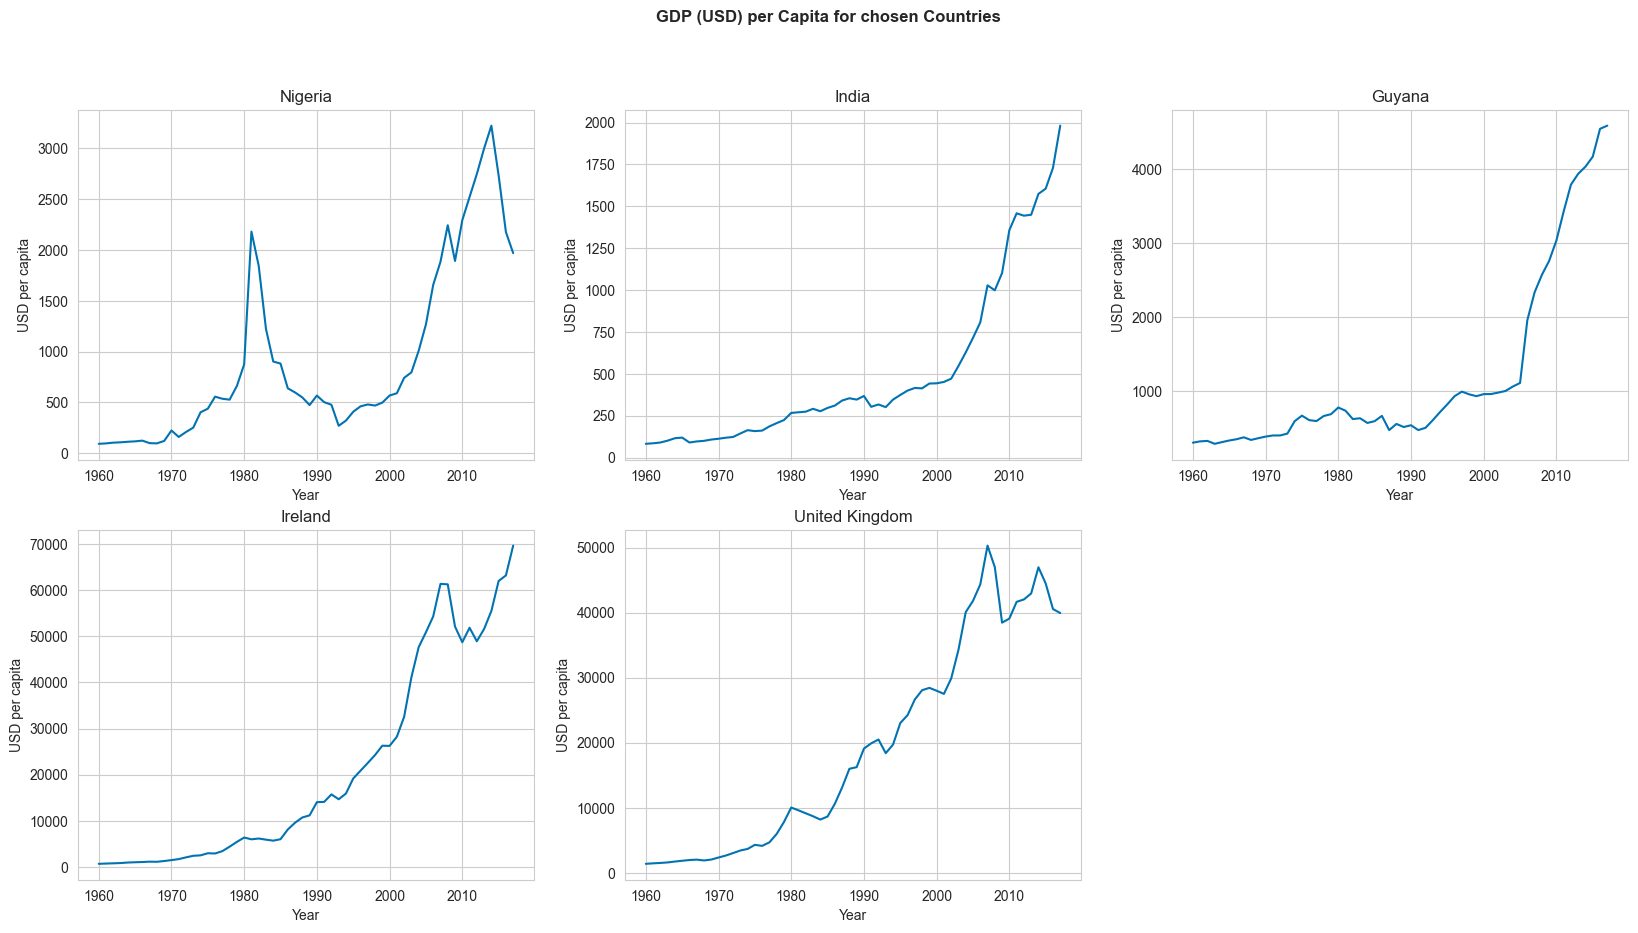

In [ ]:
# GDP per capital growth over the years, for the chosen countries

from IPython.display import display

fig, ax = plt.subplots(2, 3, figsize=(20, 10))


df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[0]]
ax[0, 0].plot(df["year"], df["GDP per capita (USD)"])
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("USD per capita")
ax[0, 0].set_title(f"{list_of_chosen_countries[0]}")

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[1]]
ax[0, 1].plot(df["year"], df["GDP per capita (USD)"])
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("USD per capita")
ax[0, 1].set_title(f"{list_of_chosen_countries[1]}")

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[2]]
ax[0, 2].plot(df["year"], df["GDP per capita (USD)"])
ax[0, 2].set_xlabel("Year")
ax[0, 2].set_ylabel("USD per capita")
ax[0, 2].set_title(f"{list_of_chosen_countries[2]}")

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[3]]
ax[1, 0].plot(df["year"], df["GDP per capita (USD)"])
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("USD per capita")
ax[1, 0].set_title(f"{list_of_chosen_countries[3]}")

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[4]]
ax[1, 1].plot(df["year"], df["GDP per capita (USD)"])
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("USD per capita")
ax[1, 1].set_title(f"{list_of_chosen_countries[4]}")

fig.delaxes(ax[1, 2])

plt.savefig("GDP (USD) per Capita for chosen Countries.png", dpi=300)  # TODO
plt.suptitle("GDP (USD) per Capita for chosen Countries", fontweight="bold")
plt.show()

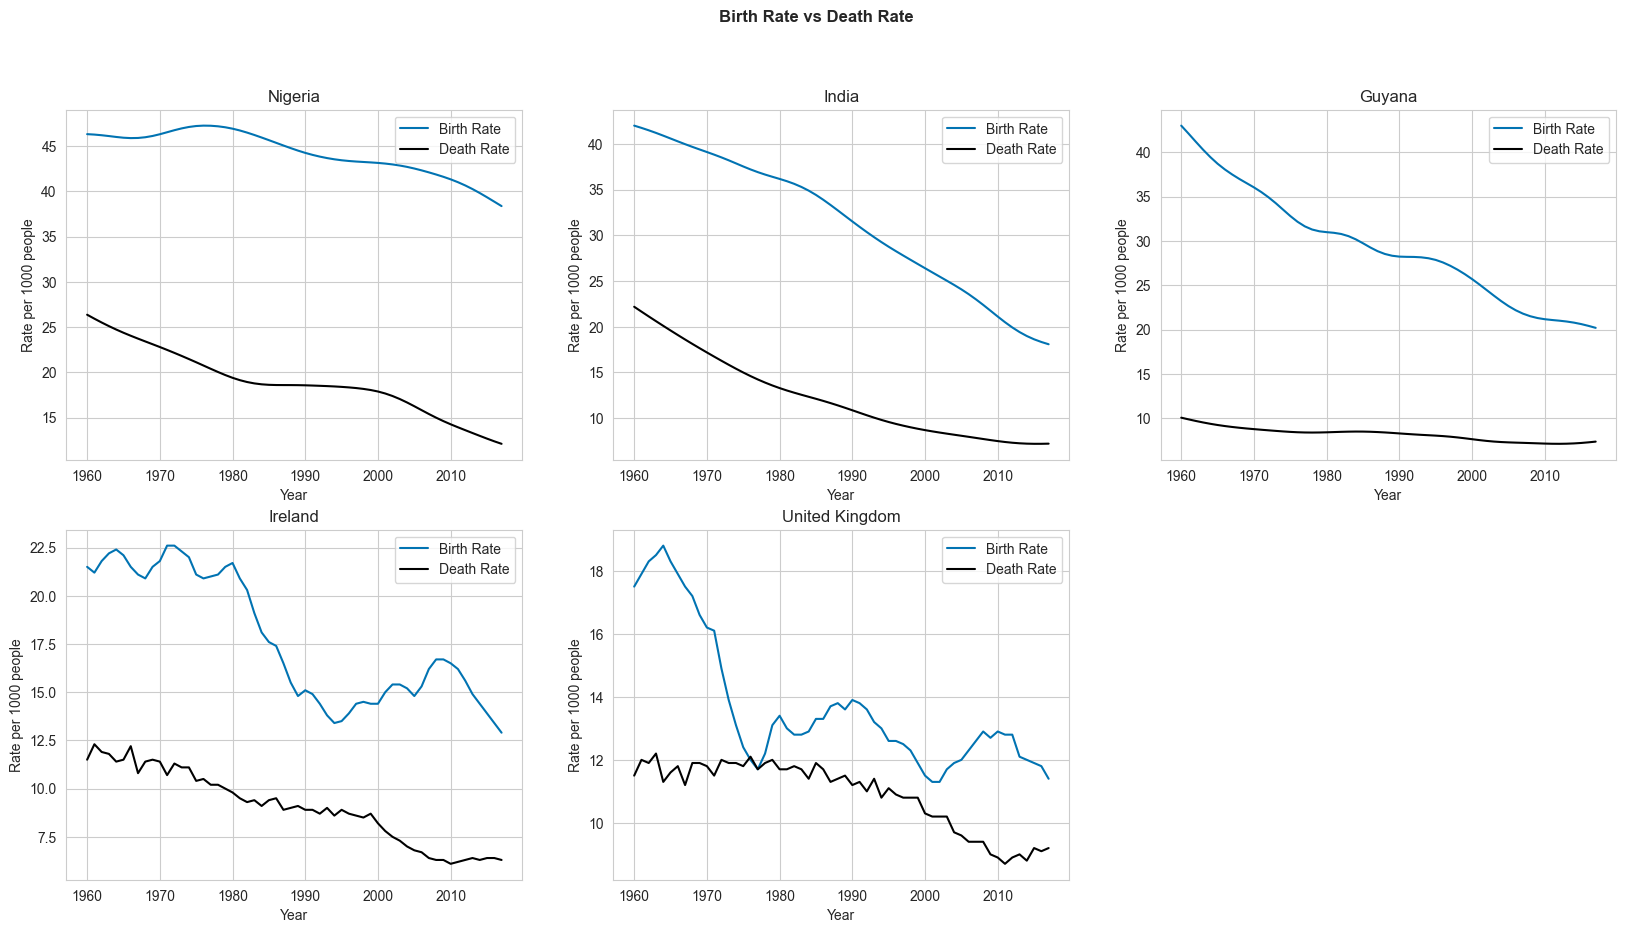

In [41]:
# birth rate vs death rate

from IPython.display import display

fig, ax = plt.subplots(2, 3, figsize=(20, 10))


df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[0]]
ax[0, 0].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[0, 0].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("Rate per 1000 people")
ax[0, 0].set_title(f"{list_of_chosen_countries[0]}")
ax[0, 0].legend()

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[1]]
ax[0, 1].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[0, 1].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("Rate per 1000 people")
ax[0, 1].set_title(f"{list_of_chosen_countries[1]}")
ax[0, 1].legend()

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[2]]
ax[0, 2].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[0, 2].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[0, 2].set_xlabel("Year")
ax[0, 2].set_ylabel("Rate per 1000 people")
ax[0, 2].set_title(f"{list_of_chosen_countries[2]}")
ax[0, 2].legend()

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[3]]
ax[1, 0].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[1, 0].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("Rate per 1000 people")
ax[1, 0].set_title(f"{list_of_chosen_countries[3]}")
ax[1, 0].legend()

df = wb_filtered[wb_filtered["Country Name"] == list_of_chosen_countries[4]]
ax[1, 1].plot(
    df["year"], df["Birth rate, crude (per 1,000 people)"], label="Birth Rate"
)
ax[1, 1].plot(
    df["year"], df["Death rate, crude (per 1,000 people)"], label="Death Rate", c="k"
)
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("Rate per 1000 people")
ax[1, 1].set_title(f"{list_of_chosen_countries[4]}")
ax[1, 1].legend()

fig.delaxes(ax[1, 2])

plt.suptitle("Birth Rate vs Death Rate", fontweight="bold")
plt.show()

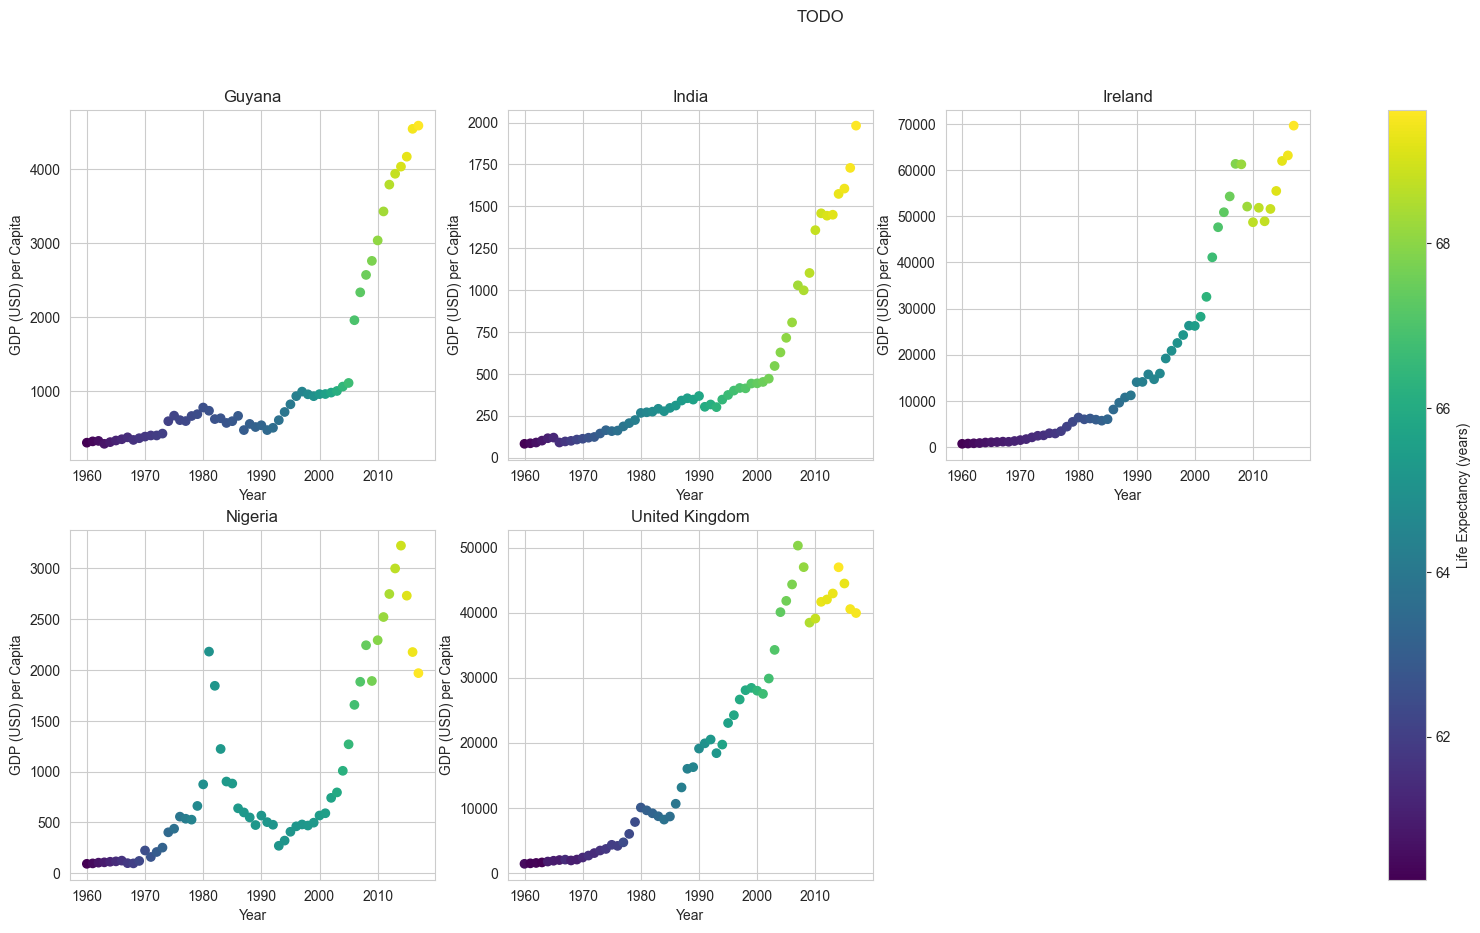

In [42]:
# Scatterplot: GDP per capita vs life expectancy

gdp_le = wb_filtered.sort_values(["Country Name", "year"])

width = 3
i = 0

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

cbar_vars = []

for j, country in enumerate(gdp_le["Country Name"].unique()):
    if j >= width and j % width < 1:
        i += 1

    temp = gdp_le[gdp_le["Country Name"] == country]

    cbar_vars.append(
        ax[i, j % width].scatter(
            temp["year"],
            temp["GDP per capita (USD)"],
            c=temp["Life expectancy at birth (years)"],
            cmap="viridis",
        )
    )
    ax[i, j % width].set_xlabel("Year")
    ax[i, j % width].set_ylabel("GDP (USD) per Capita")
    ax[i, j % width].set_title(f"{country}")

fig.delaxes(ax[i, j % width + 1])

plt.suptitle("TODO")  # TODO
cbar = plt.colorbar(cbar_vars[0], ax=ax.ravel().tolist(), shrink=1)
cbar.set_label("Life Expectancy (years)")

plt.show()

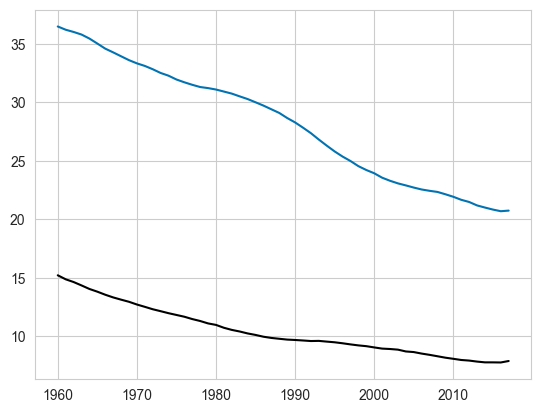

In [43]:
world_stats = wb.groupby("year").agg(
    {
        "Birth rate, crude (per 1,000 people)": "mean",
        "Death rate, crude (per 1,000 people)": "mean",
    }
)

plt.plot(world_stats.index, world_stats["Birth rate, crude (per 1,000 people)"])
plt.plot(world_stats.index, world_stats["Death rate, crude (per 1,000 people)"], c="k")

#### <u>HDI Viz</u>

In [44]:
hdi_filtered = hdim[hdim["country"].isin(list_of_chosen_countries)]
hdi_filtered

,iso3,country,hdicode,region,static_hdi_rank_2021,year,hdi_rank,hdi,le,eys,mys,gnipc,gdi_group,gdi,hdi_f,le_f,eys_f,mys_f,gni_pc_f,hdi_m,le_m,eys_m,mys_m,gni_pc_m,ihdi,coef_ineq,loss,ineq_le,ineq_edu,ineq_inc,gii_rank,gii,mmr,abr,se_f,se_m,pr_f,pr_m,lfpr_f,lfpr_m,rankdiff_hdi_phdi,phdi,diff_hdi_phdi,co2_prod,mf
1952,GBR,United Kingdom,Very High,NaN,18.0,1990,NaN,0.804,75.7359,13.654990,9.635440,30951.712960,NaN,0.970,0.789631,78.5040,13.715040,9.625041,21926.260010,0.814294,72.8411,13.598350,9.645839,40500.860230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255,9.0,34.556,65.623968,65.724250,11.578341,88.421659,52.497,74.436,NaN,0.665,17.288557,10.507575,20.79
1953,GBR,United Kingdom,Very High,NaN,18.0,1991,NaN,0.809,75.9098,13.926670,9.724416,30605.647880,NaN,0.970,0.793854,78.6136,14.020740,9.702265,21738.560020,0.818753,73.0805,13.837290,9.746567,39987.178130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254,9.0,34.432,66.805833,66.907921,11.578341,88.421659,52.318,73.857,NaN,0.669,17.305315,10.620043,20.49
1954,GBR,United Kingdom,Very High,NaN,18.0,1992,NaN,0.816,76.3063,14.275470,9.813392,31001.960390,NaN,0.969,0.801040,78.9624,14.367280,9.779488,22196.474810,0.826261,73.5118,14.187610,9.847296,40317.296570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250,9.0,32.916,67.987698,68.091592,11.578341,88.421659,52.470,73.151,NaN,0.677,17.034314,10.320708,20.36
1955,GBR,United Kingdom,Very High,NaN,18.0,1993,NaN,0.820,76.1627,14.486753,9.902368,31663.944450,NaN,0.970,0.805442,78.7679,14.589415,9.900342,22920.625920,0.829967,73.4410,14.387380,9.948024,40911.423680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244,10.0,31.115,69.169563,69.275263,11.578341,88.421659,52.543,72.011,NaN,0.682,16.829268,10.045353,20.39
1956,GBR,United Kingdom,Very High,NaN,18.0,1994,NaN,0.828,76.7221,14.698037,9.991344,33332.348100,NaN,0.971,0.813945,79.3070,14.811550,9.978968,24218.351700,0.838334,73.9952,14.587150,10.048753,42968.660550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238,10.0,28.795,70.351428,70.458934,11.578341,88.421659,52.589,71.671,NaN,0.688,16.908213,9.948186,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,NGA,Nigeria,Low,SSA,163.0,2017,NaN,0.526,52.3052,9.758482,6.697552,5031.603971,NaN,0.861,0.486056,52.5886,9.220344,5.647586,4026.942598,0.564510,52.0165,10.382992,7.768286,6017.440060,0.335,36.059321,36.311787,41.924824,38.09476,28.15838,NaN,0.670,917.0,103.925,36.812211,52.263521,5.769231,94.230769,49.934,60.076,NaN,0.516,1.901141,0.597482,3.23
4092,NGA,Nigeria,Low,SSA,163.0,2018,NaN,0.531,52.5536,9.937831,6.958531,4928.925873,NaN,0.860,0.490662,52.7698,9.394428,5.909182,3913.558361,0.570499,52.3311,10.584806,8.039183,5924.601224,0.335,36.649009,36.911488,41.480267,40.41507,28.05169,NaN,0.670,917.0,103.466,38.459091,53.709408,5.769231,94.230769,49.516,60.371,NaN,0.520,2.071563,0.653112,3.53
4093,NGA,Nigeria,Low,SSA,163.0,2019,NaN,0.538,52.9104,10.127584,7.181074,4971.470226,NaN,0.844,0.490424,53.1647,9.578901,6.144916,3361.297671,0.581294,52.6513,10.799039,8.249764,6549.383352,0.340,36.470631,36.802974,40.945133,40.41507,28.05169,NaN,0.683,917.0,102.807,40.357921,55.285032,4.112554,95.887446,49.098,60.665,NaN,0.526,2.230483,0.647401,3.60
4094,NGA,Nigeria,Low,SSA,163.0,2020,NaN,0.535,52.8870,10.127584,7.181074,4739.674805,NaN,0.864,0.495912,53.3226,9.578901,6.144916,3717.447742,0.574055,52.4556,10.799039,8.249764,5740.932048,0.340,36.225897,36.448598,40.210930,40.41507,28.05169,NaN,0.680,917.0,102.215,40.357921,55.285032,4.477612,95.522388,47.593,59.216,NaN,0.524,2.056075,0.608631,3.60


In [45]:
# Male mean years of schooling vs Female mean years of schooling (mys_f vs mys_m)
# compared to labour force participatiion rate female vs male (lfpr_f vs lfpr_m)
# compared to share of seats in parliament female vs male (pr_f vs pr_m)

In [46]:
hdim["iso3"].str.len().value_counts()

iso3
3    6240
Name: count, dtype: int64

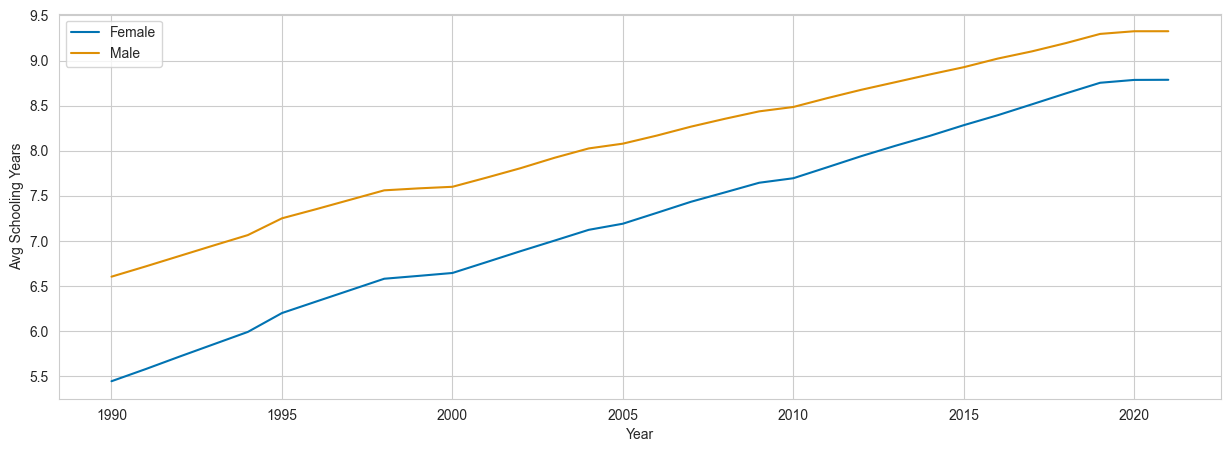

In [47]:
hdim_agg = hdim.groupby("year").agg(
    {
        "mys_f": "mean",
        "mys_m": "mean",
    }
)

plt.figure(figsize=(15, 5))
plt.plot(hdim_agg.index, hdim_agg["mys_f"], label="Female")
plt.plot(hdim_agg.index, hdim_agg["mys_m"], label="Male")

plt.xlabel("Year")
plt.ylabel("Avg Schooling Years")
plt.title("")  # TODO

plt.legend()
plt.show()

/var/folders/nd/bcfcgstn6x78dlj1cwl0tq7m0000gn/T/ipykernel_72293/3781627512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_filtered['education_gap'] = hdi_filtered['mys_m'] - hdi_filtered['mys_f']


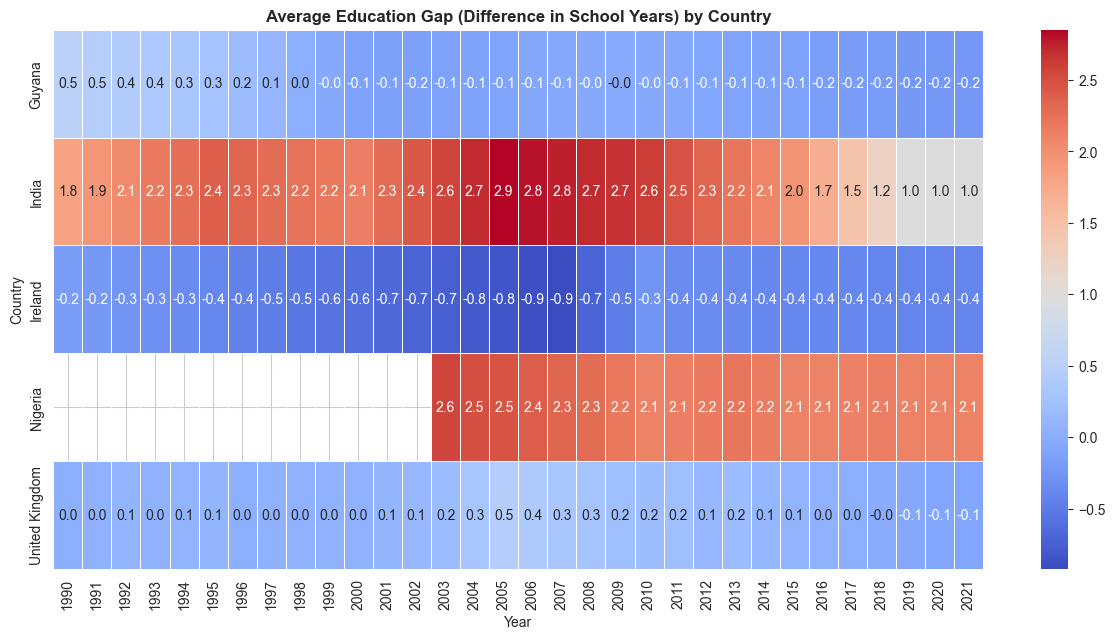

In [48]:
hdi_filtered["education_gap"] = hdi_filtered["mys_m"] - hdi_filtered["mys_f"]

heatmap_data = hdi_filtered.pivot_table(
    index="country", columns="year", values="education_gap", aggfunc="mean"
)

plt.figure(figsize=(15, 7))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)

plt.title(
    "Average Education Gap (Difference in School Years) by Country", fontweight="bold"
)  # TODO
plt.ylabel("Country")
plt.xlabel("Year")
plt.show()

In [ ]:
ts_plot = hdim.hvplot.line(
    x="year",
    y="co2_prod",
    groupby="country",
    widget_location="left_top",
    title="CO2 Production Trends by Country",
    xlabel="Year",
    ylabel="CO2 Production",
    hover_cols=["hdi_rank"],
    width=500,
    height=300,
)

ts_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'42488ebd-bc78-4f32-b2b3-a9630766d904': {'version…

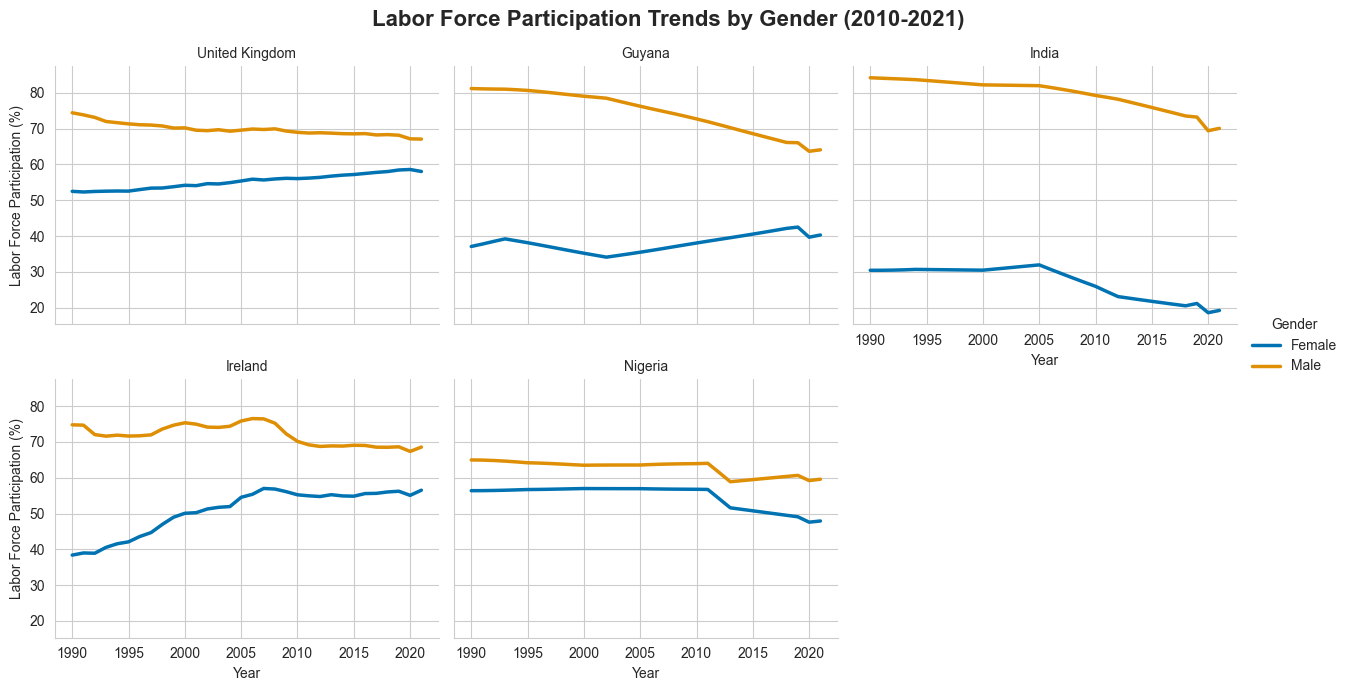

In [ ]:
hdi_melted = hdi_filtered.melt(
    id_vars=["country", "year"],
    value_vars=["lfpr_f", "lfpr_m"],
    var_name="Gender",
    value_name="Participation Rate",
)
hdi_melted["Gender"] = hdi_melted["Gender"].replace(
    {"lfpr_f": "Female", "lfpr_m": "Male"}
)

g = sns.FacetGrid(hdi_melted, col="country", col_wrap=3, height=3.5, aspect=1.2)

g.map_dataframe(
    sns.lineplot, x="year", y="Participation Rate", hue="Gender", linewidth=2.5
)

g.add_legend(title="Gender")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Labor Force Participation (%)")

g.figure.suptitle(
    "Labor Force Participation Trends by Gender (2010-2021)",
    fontsize=16,
    fontweight="bold",
)  # TODO adjust super title
g.figure.subplots_adjust(top=0.9)
plt.show()

# Appendix

QR Code for project on GitHub
![QR Code for GitHub link](./qrcode.png)